In [64]:
import os 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score,plot_roc_curve,auc,roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import numpy as np

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez-Batch-17/main/Day%2017%2618%20SVM/Cellphone.csv")

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [5]:
data.shape

(2000, 21)

In [8]:
X = data.drop('price_range',axis = 1)
y = data['price_range']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 100)

In [11]:
svm = SVC()
svm.fit(x_train,y_train)
score = svm.score(x_test,y_test)
print(score)

0.95


In [12]:
score = svm.score(x_train,y_train)
print(score)

0.9573333333333334


In [16]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(x_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

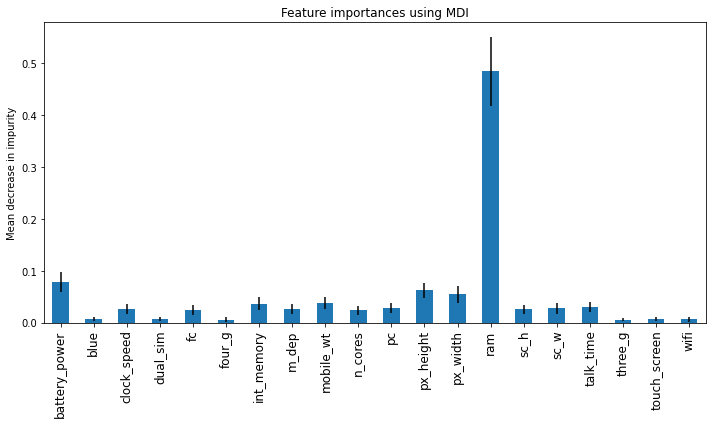

In [20]:
#import pandas as pd
x_tick_labels = X.columns
forest_importances = pd.Series(importances, index=x_tick_labels)

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xticklabels(x_tick_labels,rotation = 'vertical',fontsize = 12)
fig.tight_layout()

In [22]:
forest_importances

battery_power    0.077637
blue             0.006475
clock_speed      0.025487
dual_sim         0.006336
fc               0.024460
four_g           0.005879
int_memory       0.036378
m_dep            0.025519
mobile_wt        0.037964
n_cores          0.023345
pc               0.027916
px_height        0.061990
px_width         0.054181
ram              0.484660
sc_h             0.025528
sc_w             0.027194
talk_time        0.030258
three_g          0.005530
touch_screen     0.007218
wifi             0.006046
dtype: float64

In [25]:
from sklearn.inspection import permutation_importance

#start_time = time.time()
result = permutation_importance(
    forest, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
#elapsed_time = time.time() - start_time
#print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

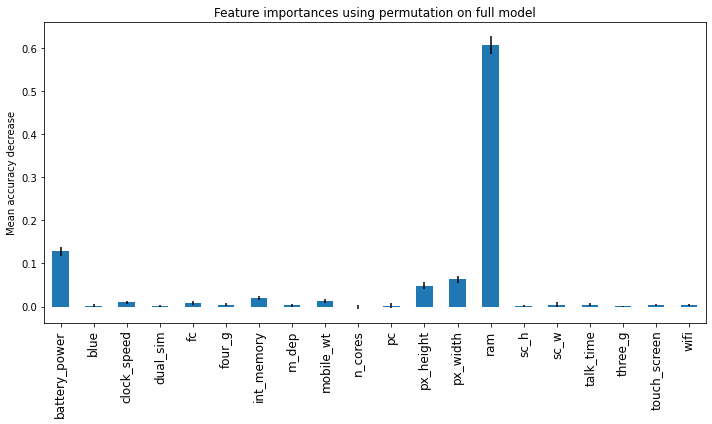

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
ax.set_xticklabels(x_tick_labels,rotation = 'vertical',fontsize = 12)
fig.tight_layout()
plt.show()

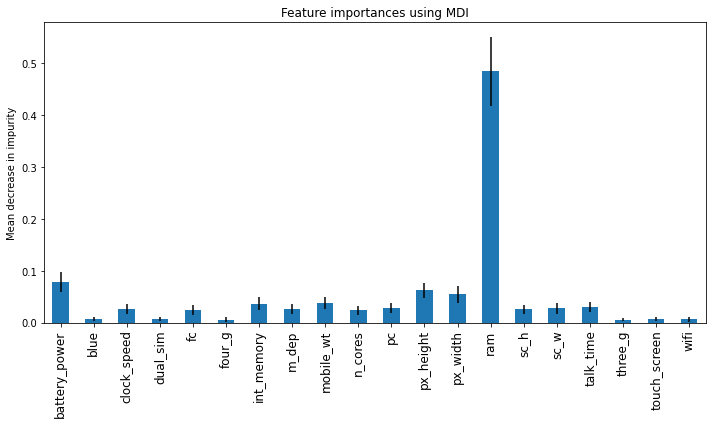

In [28]:
#Based on Impurity method
#The Top Train Features ['battery_power' 'dual_sim' 'px_height' 'px_width' 'ram']


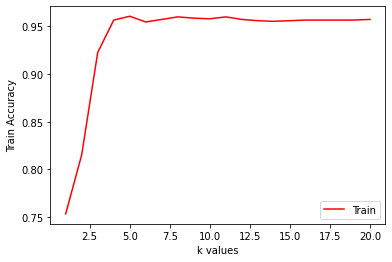

In [32]:
from sklearn.feature_selection import SelectKBest, f_classif

train_accuracy = []
k = np.arange(1,21)

for i in k: 
  select = SelectKBest(f_classif,k=i)
  x_train_new = select.fit_transform(x_train,y_train)
  svm.fit(x_train_new,y_train)
  train_accuracy.append(svm.score(x_train_new,y_train))

plt.plot(k,train_accuracy,color = 'red',label = 'Train')
plt.xlabel('k values')
plt.ylabel('Train Accuracy')
plt.legend()
plt.show()



In [39]:
select_top = SelectKBest(f_classif,k=5)
x_train_new = select_top.fit_transform(x_train,y_train)
x_test_new = select_top.fit_transform(x_test,y_test)
print("The Top Train Features", x_train.columns.values[select_top.get_support()])
print("The Top Test Features", x_test.columns.values[select_top.get_support()])

The Top Train Features ['battery_power' 'dual_sim' 'px_height' 'px_width' 'ram']
The Top Test Features ['battery_power' 'dual_sim' 'px_height' 'px_width' 'ram']


In [40]:
x_train_new

array([[1002.,  146.,  115., 1111., 1295.],
       [ 547.,  154.,  371.,  541., 2705.],
       [1748.,  114.,  718., 1109., 2633.],
       ...,
       [ 649.,  190.,  344., 1551.,  739.],
       [1647.,  102.,  193., 1185., 2532.],
       [1330.,  177.,  194.,  892., 2678.]])

In [48]:
dict(kernels = kernels,C=c, gamma = gammas)

{'C': [1.0, 0.25, 0.5, 0.75],
 'gamma': ['auto', 0.01, 0.001, 1],
 'kernels': ['linear', 'rbf']}

In [50]:
#hyperparameter tuning
#HW
#RandomsearchCV 
#Manual Search - Parameters with balance score bet train and test and high


c = [1.0, 0.25, 0.5, 0.75]
kernels = ['linear', 'rbf']
gammas = ['auto', 0.01, 0.001, 1] #1/n_feature

svm = SVC()

grid_svm = GridSearchCV(estimator = svm, param_grid = dict(kernel = kernels, C = c, gamma = gammas), cv = 5)
grid_svm.fit(x_train_new, y_train)
print('The best hyperparamters: ', grid_svm.best_params_)

The best hyperparamters:  {'C': 1.0, 'gamma': 'auto', 'kernel': 'linear'}


In [52]:
svc_model = SVC(C = 0.5,gamma = 'auto',kernel = 'linear')
svc_model.fit(x_train_new,y_train)
print("The train accuracy ", svc_model.score(x_train_new,y_train))
print("The test accuracy ", svc_model.score(x_test_new,y_test))

The train accuracy  0.98
The test accuracy  0.868


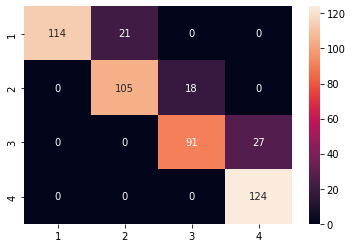

In [54]:
y_predict = svc_model.predict(x_test_new)
classes = [1,2,3,4]
sns.heatmap(confusion_matrix(y_test,y_predict),annot = True,fmt = 'g',xticklabels =classes,yticklabels = classes)

In [57]:
x_test_new

array([[1.081e+03, 1.000e+00, 2.840e+02, 5.190e+02, 3.250e+02],
       [9.890e+02, 0.000e+00, 6.700e+02, 8.040e+02, 2.349e+03],
       [1.720e+03, 1.000e+00, 4.090e+02, 6.460e+02, 1.222e+03],
       ...,
       [1.811e+03, 0.000e+00, 3.580e+02, 6.140e+02, 2.847e+03],
       [1.334e+03, 0.000e+00, 1.187e+03, 1.974e+03, 2.542e+03],
       [8.790e+02, 1.000e+00, 4.630e+02, 1.038e+03, 2.927e+03]])

In [55]:
y_test

1025    0
1208    1
1055    1
367     3
815     2
       ..
1948    1
1064    1
1764    2
374     3
363     2
Name: price_range, Length: 500, dtype: int64

In [ ]:
y_predict

In [73]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

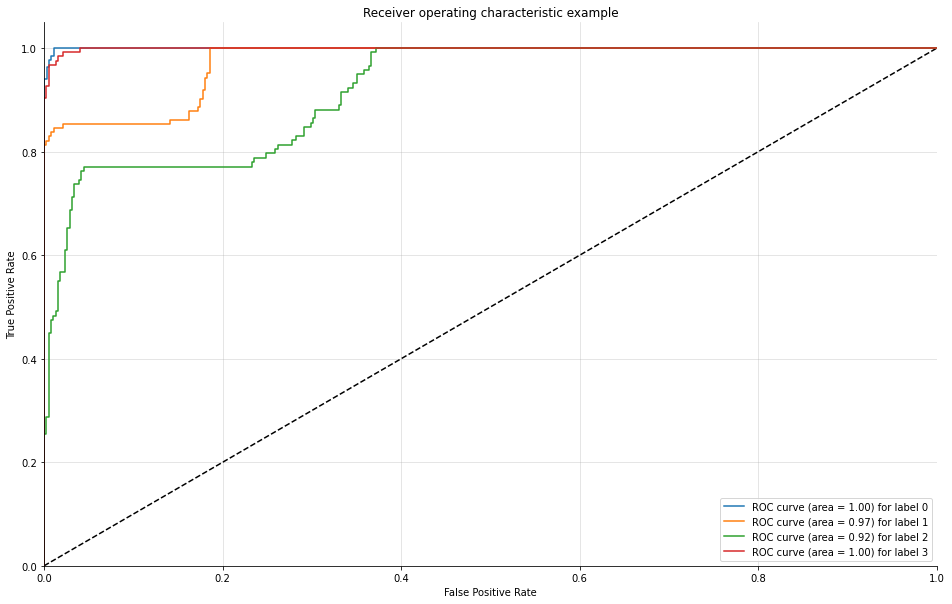

In [74]:
plot_multiclass_roc(svc_model,x_test_new,y_test,n_classes = 4,figsize = (16,10))